## Plot changes to glacier length and area

In [8]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import os

In [12]:
# Plot timeseries of glacier data from excel spreadsheet
glacier_data_xl = pd.ExcelFile("../../data/Greenland_glacier_terminus/glacier_data.xlsx")

print(glacier_data_xl.sheet_names)

sver_df = glacier_data_xl.parse(glacier_data_xl.sheet_names[0])
ko_df = glacier_data_xl.parse(glacier_data_xl.sheet_names[1])
rink_df = glacier_data_xl.parse(glacier_data_xl.sheet_names[2])

['Sverdrup', 'Kong Oscar', 'Rink']


In [13]:
ko_df

,Unnamed: 0,date,area (km2),length (km)
0,0,1978-07-28,41.418004,11.798061
1,1,1979-03-29,49.585562,14.124618
2,2,1980-10-07,45.022815,12.824904
3,3,1982-09-21,44.635646,12.714618
4,4,1984-05-06,46.261975,13.177883
5,5,1985-04-09,46.571876,13.266160
6,6,1986-05-30,44.621016,12.710450
7,7,1987-04-22,47.492989,13.528542
8,8,1988-03-23,47.743270,13.599835
9,9,1989-03-19,45.559033,12.977648


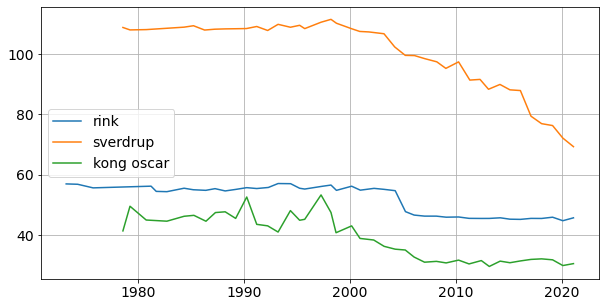

In [14]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(rink_df.date, rink_df['area (km2)'], label='rink')
plt.plot(sver_df.date, sver_df['area (km2)'], label='sverdrup')
plt.plot(ko_df.date, ko_df['area (km2)'], label='kong oscar')
plt.legend()
plt.grid()

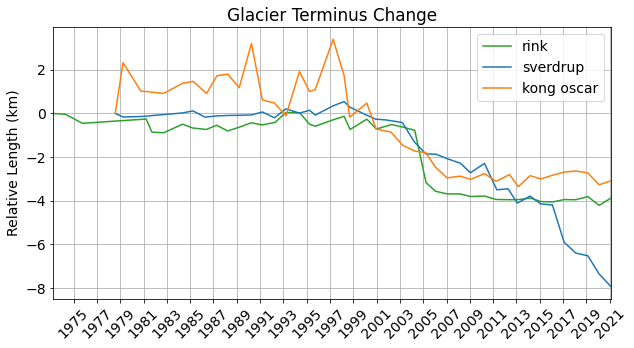

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 14

plt.plot(rink_df.date, rink_df['length (km)']-rink_df['length (km)'][0], label='rink', color='tab:green')
plt.plot(sver_df.date, sver_df['length (km)']-sver_df['length (km)'][0], label='sverdrup', color='tab:blue')
plt.plot(ko_df.date, ko_df['length (km)']-ko_df['length (km)'][0], label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change')
plt.ylabel("Relative Length (km)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

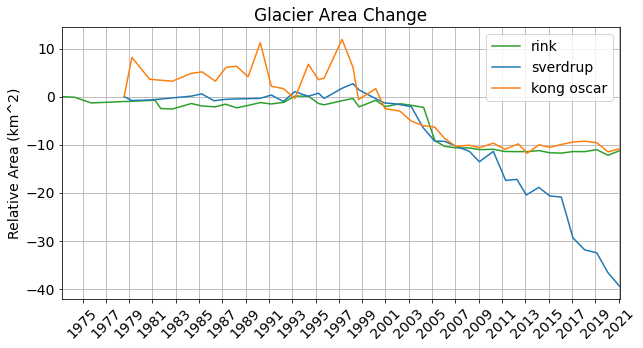

In [25]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 14

plt.plot(rink_df.date, rink_df['area (km2)']-rink_df['area (km2)'][0], label='rink', color='tab:green')
plt.plot(sver_df.date, sver_df['area (km2)']-sver_df['area (km2)'][0], label='sverdrup', color='tab:blue')
plt.plot(ko_df.date, ko_df['area (km2)']-ko_df['area (km2)'][0], label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change')
plt.ylabel("Relative Area (km^2)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

plt.savefig("figures/Glacier_plots/glacier_area.png", bbox_inches='tight', dpi=300, facecolor='white')

## Plot glacier discharge/melt rates

### Download files from Ken's runoff dataset

https://dataverse.geus.dk/dataset.xhtml?persistentId=doi:10.22008/FK2/AA6MTB

run these lines of code in GitBash (cat is a UNIX command, not available on Windows)
>wget https://dataverse.geus.dk/api/datasets/:persistentId?persistentId=doi:10.22008/FK2/AA6MTB -O tmp.json

>cat tmp.json | tr ',' '\n' | grep -E '"persistentId"|"directoryLabel"|"filename"' | cut -d'"' -f4 > urls.txt

In [ ]:
# $SERVER/api/access/datafile/:persistentId?persistentId=${FILE_DOI} -o ${dir}/${fname}
!wget https://dataverse.geus.dk/api/access/datafile/:persistentId?persistentId=doi:10.22008/FK2/AA6MTB/CBSPRJ -O {download_root_dir + file_dir + filename}

In [ ]:
# $SERVER/api/access/datafile/:persistentId?persistentId=${FILE_DOI} -o ${dir}/${fname}
!wget https://dataverse.geus.dk/api/access/datafile/:persistentId?persistentId=doi:10.22008/FK2/AA6MTB/CBSPRJ -O ../../data/Glacier_discharge/liquid_discharge/freshwater/ice/runoff/MAR_1979.nc

In [ ]:
# identify directory for where to save files
download_root_dir = '../../data/Glacier_discharge/liquid_discharge/freshwater/'

# open .txt file that was created using Ken's bash parsing code (above)
f = open('C:/Users/marie/urls.txt').read().split()

# loop to open urls.txt file and iterate through dir, doi, filename using wget to download the file
for i in np.arange(0,len(f),3): # go through every 3 lines
    file_info = f[i:i+3]
    print(file_info)
    # isolate each
    file_dir = file_info[0] + '/'
    doi = file_info[1]
    filename = file_info[2]
    # download file using wget command
    !wget https://dataverse.geus.dk/api/access/datafile/:persistentId?persistentId={doi} -O {download_root_dir + file_dir + filename}

### Plot ice discharge - NW region

In [2]:
# look at data from https://dataverse01.geus.dk/dataset.xhtml?persistentId=doi:10.22008/FK2/OHI23Z
# Mankoff et al. 2021 https://doi.org/10.5194/essd-13-5001-2021
file_dir = Path('../../data/Glacier_discharge/')
massbalance = xr.open_dataset(file_dir / "MB_region.nc")

In [3]:
# look at data from https://dataverse01.geus.dk/dataset.xhtml?persistentId=doi:10.22008/FK2/OHI23Z
# Mankoff et al. 2021 https://doi.org/10.5194/essd-13-5001-2021
file_dir = Path('../../data/Glacier_discharge/')
massbalance_sec = xr.open_dataset(file_dir / "MB_sector.nc")

In [128]:
gate_D = xr.open_dataset(file_dir / "gate.nc")

In [ ]:
# kong oscar/Nuussuup Sermia (gate 73 and 77)
gate_D.sel(gate=73,time=slice("2018-01-01", "2020-01-01")).discharge.plot(figsize=[20,2])

In [ ]:
# sverdrup (gate 90 and 91)
gate_D.sel(gate=91,time=slice("2018-01-01", "2020-01-01")).discharge.plot()

In [ ]:
# rink (gate 66)
gate_D.sel(gate=66,time=slice("2018-01-01", "2020-01-01")).discharge.plot()

In [4]:
NW_massbalance = massbalance.sel(region='NW')

In [5]:
NW_massbalance_sec = massbalance_sec.sel(sector=81)

In [6]:
NW_massbalance

<xarray.Dataset>
Dimensions:      (time: 13400)
Coordinates:
  * time         (time) datetime64[ns] 1840-01-01 1841-01-01 ... 2022-04-15
    region       <U2 'NW'
Data variables: (12/19)
    MB           (time) float32 ...
    MB_err       (time) float32 ...
    MB_ROI       (time) float32 ...
    MB_ROI_err   (time) float32 ...
    SMB          (time) float32 ...
    SMB_err      (time) float32 ...
    ...           ...
    BMB_err      (time) float32 ...
    BMB_ROI      (time) float32 ...
    BMB_ROI_err  (time) float32 ...
    MB_HIRHAM    (time) float32 ...
    MB_MAR       (time) float32 ...
    MB_RACMO     (time) float32 ...
Attributes:
    featureType:      timeSeries
    title:            Greenland ice sheet mass balance from 1840 through next...
    summary:          Greenland ice sheet mass balance from 1840 through next...
    keywords:         Greenland; Mass; Mass balance
    source:           git commit: 686de4d
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/mass_balance
    product_version:  1.0

In [8]:
sampling_period = NW_massbalance.D_ROI.sel(time=slice("2018-08-24","2020-08-10"))

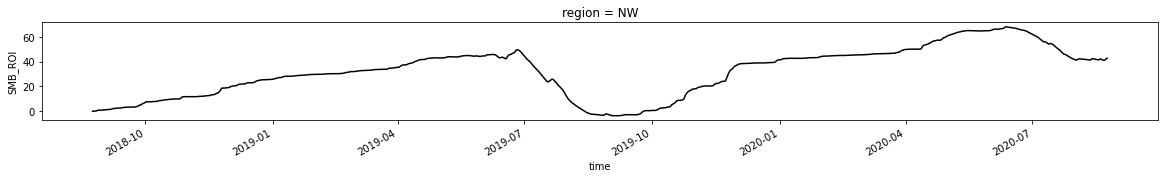

In [9]:
NW_massbalance.SMB_ROI.sel(time=slice("2018-08-24","2020-08-24")).cumsum().plot(figsize=[20,1.8], c='k')

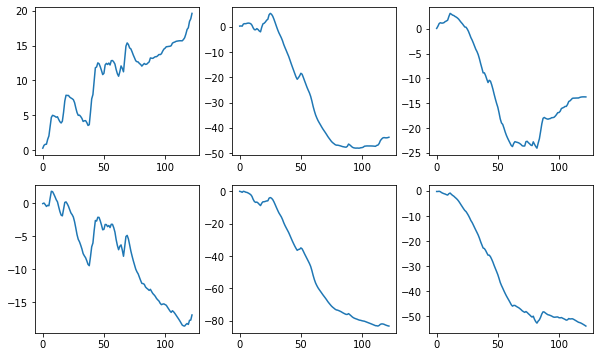

In [10]:
fig, axs = plt.subplots(2,3, figsize=[10,6])
axs = axs.ravel()

axs[0].plot(NW_massbalance.SMB_ROI.sel(time=slice("2018-06-01","2018-10-01")).cumsum()) # WHYYYY positive
axs[1].plot(NW_massbalance.SMB_ROI.sel(time=slice("2019-06-01","2019-10-01")).cumsum())
axs[2].plot(NW_massbalance.SMB_ROI.sel(time=slice("2020-06-01","2020-10-01")).cumsum())
axs[3].plot(NW_massbalance.MB_MAR.sel(time=slice("2018-06-01","2018-10-01")).cumsum())
axs[4].plot(NW_massbalance.MB_MAR.sel(time=slice("2019-06-01","2019-10-01")).cumsum())
axs[5].plot(NW_massbalance.MB_MAR.sel(time=slice("2020-06-01","2020-10-01")).cumsum())
# D plot

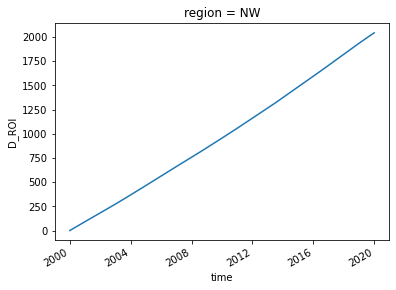

In [74]:
NW_massbalance.D_ROI.sel(time=slice("2000-01-01","2020-01-01")).cumsum().plot()

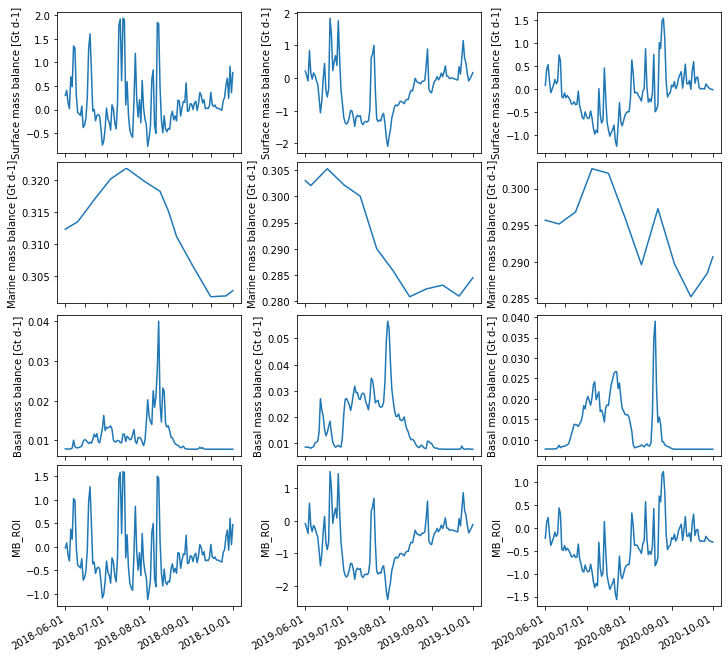

In [11]:
fig, axs = plt.subplots(4,3, figsize=[10,9],constrained_layout=True)
axs = axs.ravel()

time_slice1 = slice("2018-06-01","2018-10-01")
time_slice2 = slice("2019-06-01","2019-10-01")
time_slice3 = slice("2020-06-01","2020-10-01")

NW_massbalance.SMB_ROI.sel(time=time_slice1).plot(ax=axs[0]) # WHYYYY positive
NW_massbalance.SMB_ROI.sel(time=time_slice2).plot(ax=axs[1])
NW_massbalance.SMB_ROI.sel(time=time_slice3).plot(ax=axs[2])

NW_massbalance.D_ROI.sel(time=time_slice1).plot(ax=axs[3])
NW_massbalance.D_ROI.sel(time=time_slice2).plot(ax=axs[4])
NW_massbalance.D_ROI.sel(time=time_slice3).plot(ax=axs[5])

NW_massbalance.BMB_ROI.sel(time=time_slice1).plot(ax=axs[6])
NW_massbalance.BMB_ROI.sel(time=time_slice2).plot(ax=axs[7])
NW_massbalance.BMB_ROI.sel(time=time_slice3).plot(ax=axs[8])

NW_massbalance.MB_ROI.sel(time=time_slice1).plot(ax=axs[9])
NW_massbalance.MB_ROI.sel(time=time_slice2).plot(ax=axs[10])
NW_massbalance.MB_ROI.sel(time=time_slice3).plot(ax=axs[11])

plt.setp(axs, xticklabels=[], xlabel="", title="");

plt.sca(axs[9])
months = pd.date_range("2018-06-01","2018-10-01",freq='MS').strftime("%Y-%m-%d").tolist()
plt.xticks(months, months);

plt.sca(axs[10])
months = pd.date_range("2019-06-01","2019-10-01",freq='MS').strftime("%Y-%m-%d").tolist()
plt.xticks(months, months);

plt.sca(axs[11])
months = pd.date_range("2020-06-01","2020-10-01",freq='MS').strftime("%Y-%m-%d").tolist()
plt.xticks(months, months);

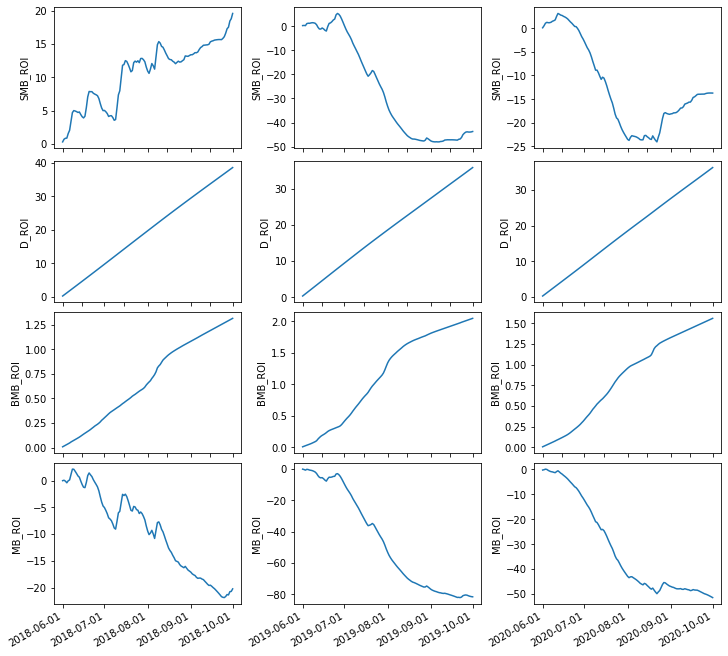

In [87]:
fig, axs = plt.subplots(4,3, figsize=[10,9],constrained_layout=True)
axs = axs.ravel()

time_slice1 = slice("2018-06-01","2018-10-01")
time_slice2 = slice("2019-06-01","2019-10-01")
time_slice3 = slice("2020-06-01","2020-10-01")

NW_massbalance.SMB_ROI.sel(time=time_slice1).cumsum().plot(ax=axs[0]) # WHYYYY positive
NW_massbalance.SMB_ROI.sel(time=time_slice2).cumsum().plot(ax=axs[1])
NW_massbalance.SMB_ROI.sel(time=time_slice3).cumsum().plot(ax=axs[2])

NW_massbalance.D_ROI.sel(time=time_slice1).cumsum().plot(ax=axs[3])
NW_massbalance.D_ROI.sel(time=time_slice2).cumsum().plot(ax=axs[4])
NW_massbalance.D_ROI.sel(time=time_slice3).cumsum().plot(ax=axs[5])

NW_massbalance.BMB_ROI.sel(time=time_slice1).cumsum().plot(ax=axs[6])
NW_massbalance.BMB_ROI.sel(time=time_slice2).cumsum().plot(ax=axs[7])
NW_massbalance.BMB_ROI.sel(time=time_slice3).cumsum().plot(ax=axs[8])

NW_massbalance.MB_ROI.sel(time=time_slice1).cumsum().plot(ax=axs[9])
NW_massbalance.MB_ROI.sel(time=time_slice2).cumsum().plot(ax=axs[10])
NW_massbalance.MB_ROI.sel(time=time_slice3).cumsum().plot(ax=axs[11])

plt.setp(axs, xticklabels=[], xlabel="", title="");

plt.sca(axs[9])
months = pd.date_range("2018-06-01","2018-10-01",freq='MS').strftime("%Y-%m-%d").tolist()
plt.xticks(months, months);

plt.sca(axs[10])
months = pd.date_range("2019-06-01","2019-10-01",freq='MS').strftime("%Y-%m-%d").tolist()
plt.xticks(months, months);

plt.sca(axs[11])
months = pd.date_range("2020-06-01","2020-10-01",freq='MS').strftime("%Y-%m-%d").tolist()
plt.xticks(months, months);

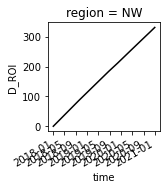

In [119]:
NW_massbalance.D_ROI.sel(time=slice("2018-01-01","2020-12-31")).cumsum().plot(figsize=[2,2], c='k')

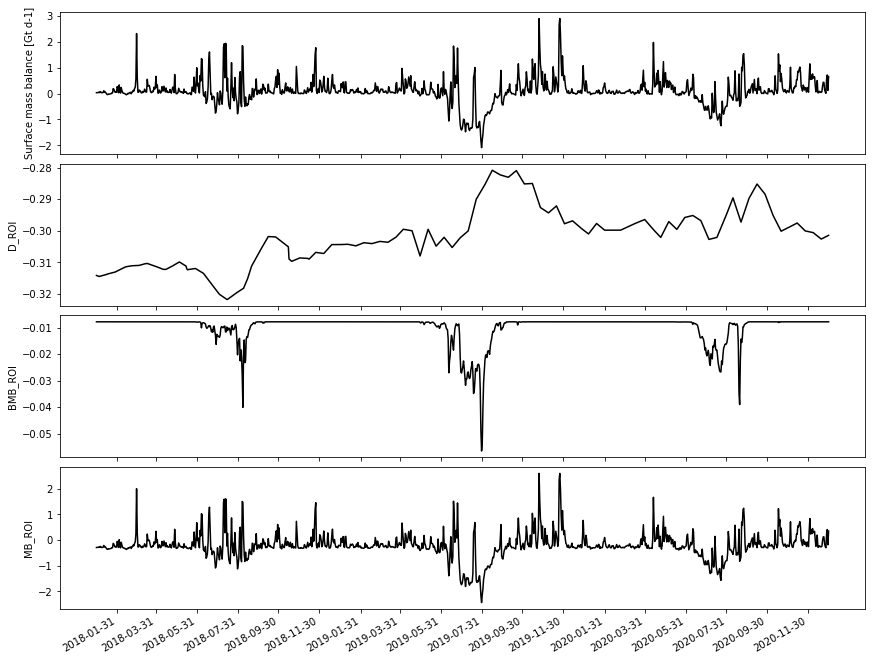

In [13]:
fig, axs = plt.subplots(4,1, figsize=[12,9],constrained_layout=True)
axs = axs.ravel()

NW_massbalance.SMB_ROI.sel(time=slice("2018-01-01","2020-12-31")).plot(c='k', ax=axs[0])

D_neg = NW_massbalance.D_ROI*(-1)
D_neg.sel(time=slice("2018-01-01","2020-12-31")).plot(c='k', ax=axs[1])

BMB_neg = NW_massbalance.BMB_ROI*(-1)
BMB_neg.sel(time=slice("2018-01-01","2020-12-31")).plot(c='k', ax=axs[2])

NW_massbalance.MB_ROI.sel(time=slice("2018-01-01","2020-12-31")).plot(c='k', ax=axs[3])

months = pd.date_range("2018-01-01","2020-12-31",freq='2M').strftime("%Y-%m-%d").tolist()
plt.setp(axs, xticks=months, xticklabels=[], xlabel="", title="");

plt.sca(axs[3])
plt.xticks(months, months);

# plt.savefig("figures/mass_balance.png", dpi=300, bbox_inches = "tight")

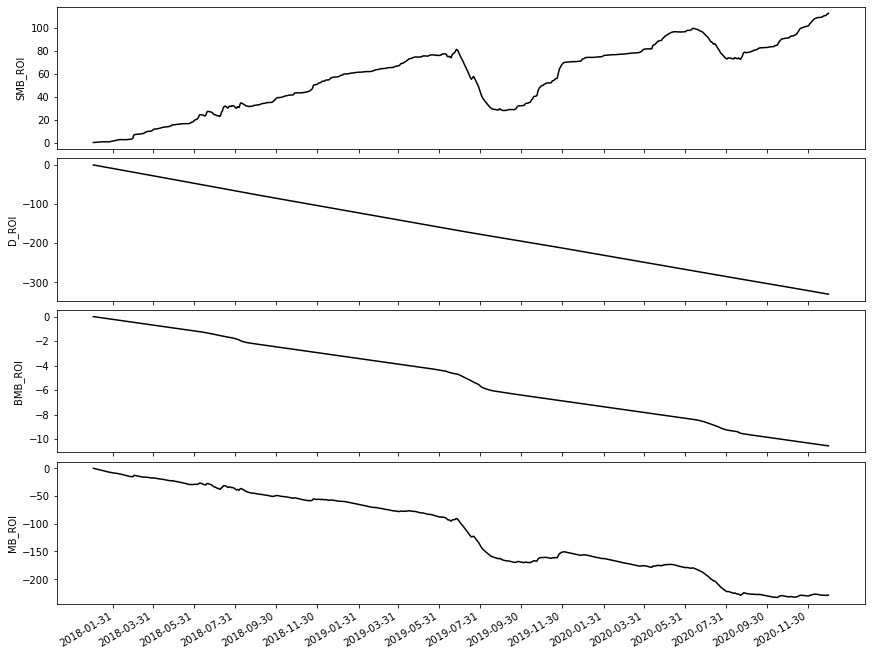

In [16]:
fig, axs = plt.subplots(4,1, figsize=[12,9],constrained_layout=True)
axs = axs.ravel()

NW_massbalance.SMB_ROI.sel(time=slice("2018-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[0])

D_neg = NW_massbalance.D_ROI*(-1)
D_neg.sel(time=slice("2018-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[1])

BMB_neg = NW_massbalance.BMB_ROI*(-1)
BMB_neg.sel(time=slice("2018-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[2])

NW_massbalance.MB_ROI.sel(time=slice("2018-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[3])

months = pd.date_range("2018-01-01","2020-12-31",freq='2M').strftime("%Y-%m-%d").tolist()
plt.setp(axs, xticks=months, xticklabels=[], xlabel="", title="");

plt.sca(axs[3])
plt.xticks(months, months);

# plt.savefig("figures/mass_balance-cumsum.png", dpi=300, bbox_inches = "tight")

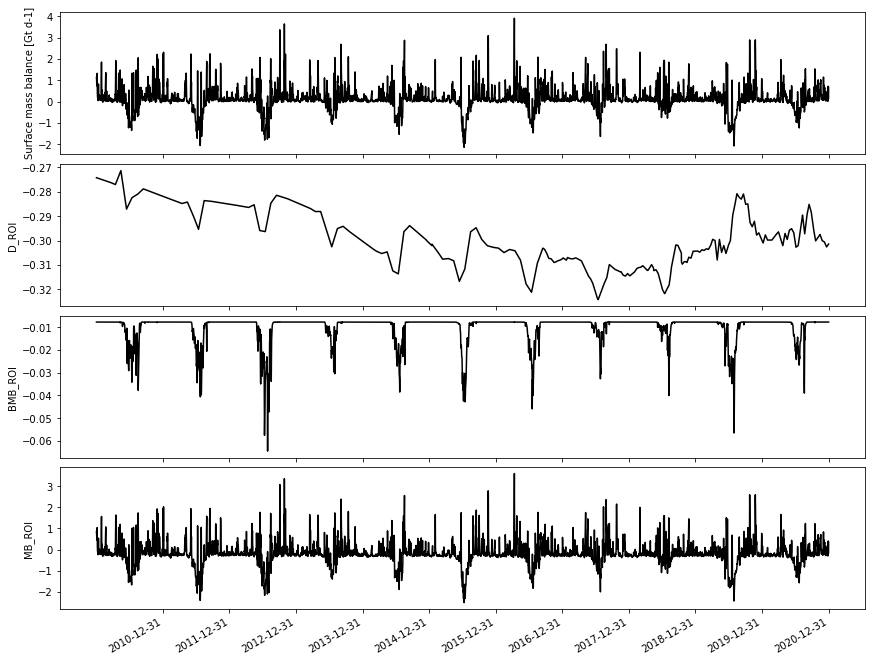

In [17]:
fig, axs = plt.subplots(4,1, figsize=[12,9],constrained_layout=True)
axs = axs.ravel()

NW_massbalance.SMB_ROI.sel(time=slice("2010-01-01","2020-12-31")).plot(c='k', ax=axs[0])

D_neg = NW_massbalance.D_ROI*(-1)
D_neg.sel(time=slice("2010-01-01","2020-12-31")).plot(c='k', ax=axs[1])

BMB_neg = NW_massbalance.BMB_ROI*(-1)
BMB_neg.sel(time=slice("2010-01-01","2020-12-31")).plot(c='k', ax=axs[2])

NW_massbalance.MB_ROI.sel(time=slice("2010-01-01","2020-12-31")).plot(c='k', ax=axs[3])

months = pd.date_range("2010-01-01","2021-01-01",freq='1Y').strftime("%Y-%m-%d").tolist()
plt.setp(axs, xticks=months, xticklabels=[], xlabel="", title="");

plt.sca(axs[3])
plt.xticks(months, months);

# plt.savefig("figures/mass_balance-alltime.png", dpi=300, bbox_inches = "tight")

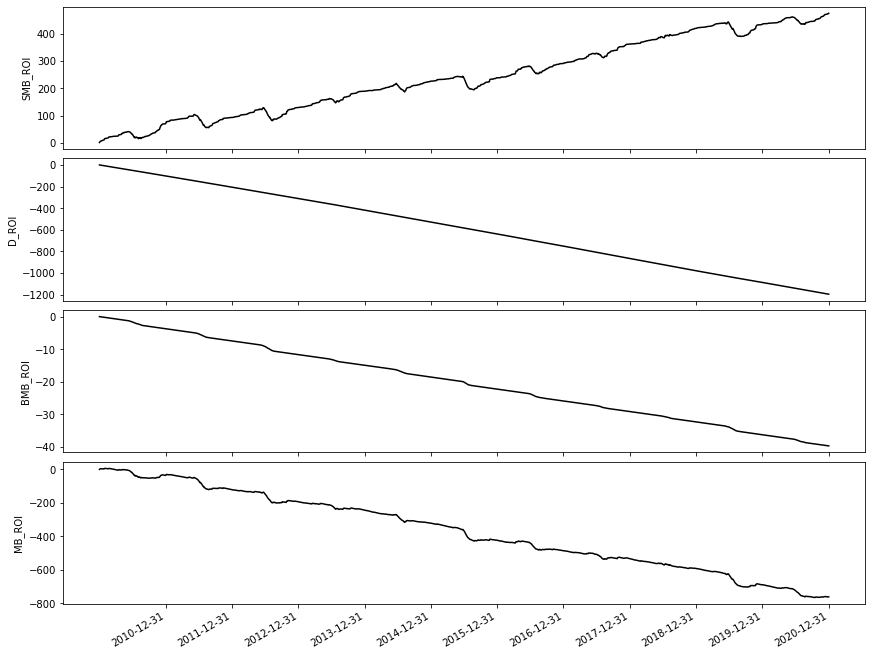

In [20]:
fig, axs = plt.subplots(4,1, figsize=[12,9],constrained_layout=True)
axs = axs.ravel()

NW_massbalance.SMB_ROI.sel(time=slice("2010-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[0])

D_neg = NW_massbalance.D_ROI*(-1)
D_neg.sel(time=slice("2010-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[1])

BMB_neg = NW_massbalance.BMB_ROI*(-1)
BMB_neg.sel(time=slice("2010-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[2])

NW_massbalance.MB_ROI.sel(time=slice("2010-01-01","2020-12-31")).cumsum().plot(c='k', ax=axs[3])

months = pd.date_range("2010-01-01","2021-01-01",freq='1Y').strftime("%Y-%m-%d").tolist()
plt.setp(axs, xticks=months, xticklabels=[], xlabel="", title="");

plt.sca(axs[3])
plt.xticks(months, months);

# plt.savefig("figures/mass_balance_cumsum-alltime.png", dpi=300, bbox_inches = "tight")

## Plots of cumulative SMB for NW Greenland

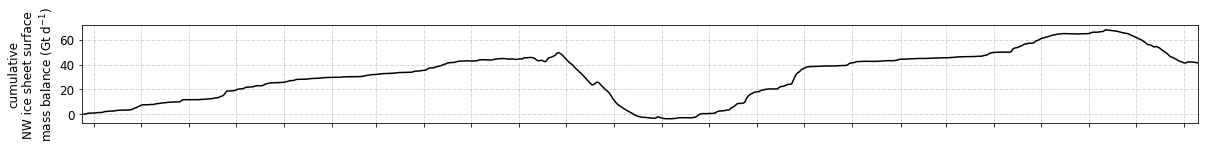

In [26]:
## Kong Oscar

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
# ticks = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A','S','O','N','D',"J '20",'F','M','A','M','J','J','A']
ticks = []
plt.rcParams['font.size'] = '12'

NW_massbalance.SMB_ROI.sel(time=slice("2018-08-24","2020-08-10")).cumsum().plot(c='k', figsize=[20,1.8])
plt.title("")
plt.xticks(months, ticks, rotation=0, horizontalalignment = 'center')
plt.margins(x=0)
plt.ylabel("cumulative\nNW ice sheet surface\nmass balance (Gt d$^{-1}$)")
plt.xlabel("")
plt.grid(linestyle='-.', linewidth=0.5)
plt.xlabel("");

# plt.savefig("figures/SMB_cum_KO_noticklabs.png", bbox_inches='tight', dpi=300)

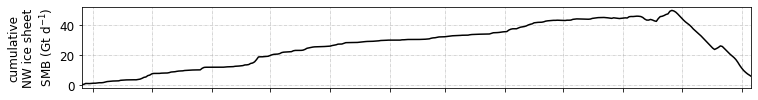

In [37]:
# Plot Rink

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
# ticks = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A']
ticks = []
plt.rcParams['font.size'] = '12'

NW_massbalance.SMB_ROI.sel(time = slice("2018-08-26","2019-08-06")).cumsum().plot(c='k', figsize=[12,1.5])
plt.title("")
plt.xticks(months, ticks, rotation=0, horizontalalignment = 'center')
plt.margins(x=0)
plt.ylabel("cumulative\nNW ice sheet\n SMB (Gt d$^{-1}$)")
plt.xlabel("")
plt.grid(linestyle='-.', linewidth=0.5)
plt.xlabel("");

# plt.savefig("figures/SMB_cum_rink_noticklabs.png", bbox_inches='tight', dpi=300)

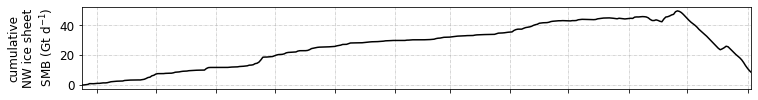

In [38]:
# Plot sverdrup
months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
# ticks = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A']
ticks = []
plt.rcParams['font.size'] = '12'

NW_massbalance.SMB_ROI.sel(time = slice("2018-08-24","2019-08-03")).cumsum().plot(c='k', figsize=[12,1.5])
plt.title("")
plt.xticks(months, ticks, rotation=0, horizontalalignment = 'center')
plt.margins(x=0)
plt.ylabel("cumulative\nNW ice sheet\n SMB (Gt d$^{-1}$)")
plt.xlabel("")
plt.grid(linestyle='-.', linewidth=0.5)
plt.xlabel("");

# plt.savefig("figures/SMB_cum_sverdrup_noticklabs.png", bbox_inches='tight', dpi=300)

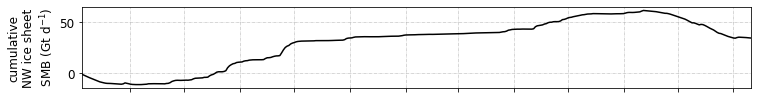

In [39]:
# Plot fisher
months = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
# ticks = ["S '19","O",'N','D',"J '20",'F','M','A','M','J','J','A']
ticks = []
plt.rcParams['font.size'] = '12'

NW_massbalance.SMB_ROI.sel(time = slice("2019-08-05","2020-08-11")).cumsum().plot(c='k', figsize=[12,1.5])
plt.title("")
plt.xticks(months, ticks, rotation=0, horizontalalignment = 'center')
plt.margins(x=0)
plt.ylabel("cumulative\nNW ice sheet\n SMB (Gt d$^{-1}$)")
plt.xlabel("")
plt.grid(linestyle='-.', linewidth=0.5)
plt.xlabel("");

# plt.savefig("figures/SMB_cum_fisher_noticklabs.png", bbox_inches='tight', dpi=300)

### Plot liquid discharge